In [1]:
# 데이터 분석용 패키지 불러오기
import pandas as pd
import numpy as np

# EDA용 패키지 불러오기
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Python에서 한글 폰트 설정
local_font_path = "c:/Windows/Fonts/malgun.ttf"
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname=local_font_path).get_name())

# 마이너스 부호 깨지는 현상 방지
plt.rc('axes', unicode_minus=False)

### 1) 데이터 불러오기

In [2]:
df = pd.read_csv('./data/movies_train.csv')
df.columns = ['영화제목','배급사','장르','개봉일자','상영시간',
                                    '상영등급','감독이름','이전영화_평균관객수',
                                    '이전영화_개수', '스태프수','배우수','관객수']
df.head()

,영화제목,배급사,장르,개봉일자,상영시간,상영등급,감독이름,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [3]:
new_columns = ['장르', '개봉일자', '상영시간', '이전영화_평균관객수', '이전영화_개수', '스태프수', '배우수', '관객수']

new_df = df.loc[:,new_columns]
new_df

,장르,개봉일자,상영시간,이전영화_평균관객수,이전영화_개수,스태프수,배우수,관객수
0,액션,2012-11-22,96,NaN,0,91,2,23398
1,느와르,2015-11-19,130,1161602.50,2,387,3,7072501
2,액션,2013-06-05,123,220775.25,4,343,4,6959083
3,코미디,2012-07-12,101,23894.00,2,20,6,217866
4,코미디,2010-11-04,108,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...
595,드라마,2014-08-13,111,3833.00,1,510,7,1475091
596,드라마,2013-03-14,127,496061.00,1,286,6,1716438
597,공포,2010-09-30,99,NaN,0,123,4,2475
598,느와르,2015-05-14,102,NaN,0,431,4,2192525


### 2) 배우수에 따른 관객수에 차이가 있는지 확인해봅시다.

### (1) plt.bar()을 이용해 시각화하기

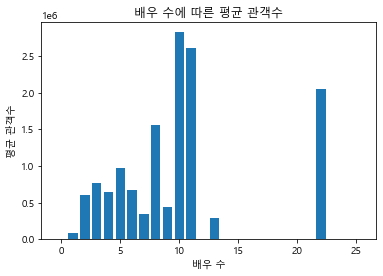

In [4]:
hypo = new_df.groupby(['배우수'])['관객수'].agg('mean')
x = hypo.index
y = hypo.values

plt.bar(x = x ,
        height = y)
plt.xlabel('배우 수')
plt.ylabel('평균 관객수')
plt.title('배우 수에 따른 평균 관객수')
plt.show()

### (2) sns.barplot()을 이용해 시각화하기

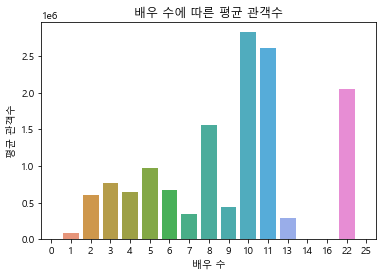

In [5]:
sns.barplot(x = '배우수',
            y = '관객수',
            data = new_df,
            ci = None
            )
plt.xlabel('배우 수')
plt.ylabel('평균 관객수')
plt.title('배우 수에 따른 평균 관객수')
plt.show()

### (3) pandas를 이용해 시각화하기

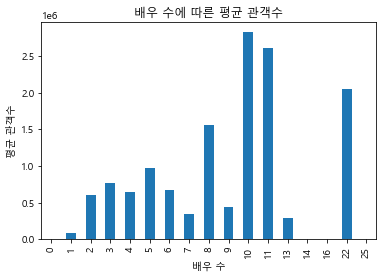

In [6]:
new_df.groupby(['배우수'])['관객수'].agg('mean').plot.bar()
plt.xlabel('배우 수')
plt.ylabel('평균 관객수')
plt.title('배우 수에 따른 평균 관객수')
plt.show()

### 3) 계절에 따라 장르별 개봉수에 차이가 있는지 확인해봅시다.

In [8]:
def season(x) : 
    s = int(x[5:7])
    
    if 1 <= s < 3 : 
        return "겨울"
    elif 3 <= s < 6 :
        return "봄"
    elif 6 <= s < 9 : 
        return "여름"
    elif 9 <= s < 12 :
        return "가을"
    elif s == 12 :
        return "겨울"

In [ ]:
new_df['계절'] = new_df['개봉일자'].apply(season)

hypo = new_df.groupby(['계절','장르']).agg('count')['개봉일자'].reset_index()

In [10]:
plt.figure(figsize = (10,6))
sns.barplot(x = '장르',
            y = '개봉일자',
            hue = '계절',
            data = hypo)
plt.show()

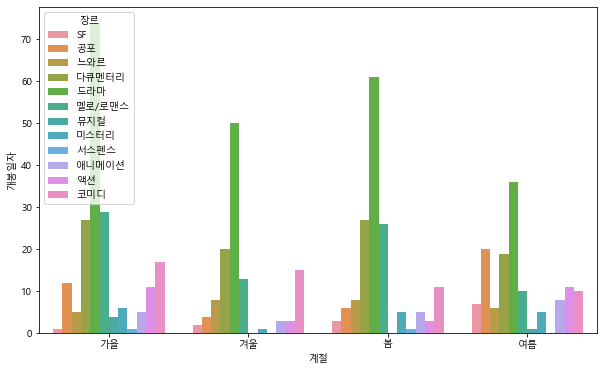

In [19]:
plt.figure(figsize = (10,6))
sns.barplot(x = '계절',
            y = '개봉일자',
            hue = '장르',
            data = hypo)
plt.show()